In [62]:
import pandas as pd


In [63]:
df=pd.read_csv("ML_datasets\Enjoy_sports.csv")
df.head()


,Sky,AirTemp,Humidity,Wind,Water,Forecast,EnjoySport
0,Sunny,Warm,Normal,Strong,Warm,Same,Yes
1,Sunny,Warm,High,Strong,Warm,Same,Yes
2,Rainy,Cold,High,Strong,Warm,Change,No
3,Sunny,Warm,High,Strong,Cool,Change,Yes


In [64]:
def find_s(df):
    positive_rows=df[df["EnjoySport"]=="Yes"]
    positive_examples=positive_rows.iloc[:,:-1].values
    hypo=["#"]*len(positive_examples[0])
    for example in positive_examples:
        for i in range(len(hypo)):
            if hypo[i] == "#":
                hypo[i] = example[i]
            elif hypo[i] != example[i]:
                hypo[i] = "?"
    return hypo    
    

In [65]:
print(find_s(df))

['Sunny', 'Warm', '?', 'Strong', '?', '?']


In [115]:
#candidate
import pandas as pd


In [116]:
df=pd.read_csv("ML_datasets\Enjoy_sports.csv")
data=df.values.tolist()

In [126]:
def candi(data):
    s=["$"]* (len(data[0])-1)
    G=[["?"]* (len(data[0])-1)]
    for row in data:
        attributes,label=row[:-1],row[-1]
        if label=="Yes":
            for i in range(len(s)):
                if s[i]=="$":
                    s[i]=attributes[i]
                elif s[i]!=attributes[i]:
                    s[i]="?"
            G=[ g for g in G if all(g[i]=="?" or g[i]==s[i] for i in range(len(s)))]
        elif label == "No":
            new_G=[]
            for g in G:
                for i in range(len(g)):
                    if g[i]=="?":
                        new_hypo=g[:]
                        new_hypo[i]=attributes[i]
                        new_G.append(new_hypo)
            G=new_G
    return s,G
                

In [127]:
S_final,G_final=candi(data)

print("Final specific hypothesis : ",S_final)
print("Final General hypothesis : ",G_final)

Final specific hypothesis :  ['Sunny', 'Warm', '?', 'Strong', '?', '?']
Final General hypothesis :  [['?', '?', '?', 'Strong', '?', '?']]


In [136]:
#Linear Regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [137]:
df=pd.read_csv("ML_datasets\salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [138]:
x=df[["YearsExperience"]]
y=df["Salary"]

In [139]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

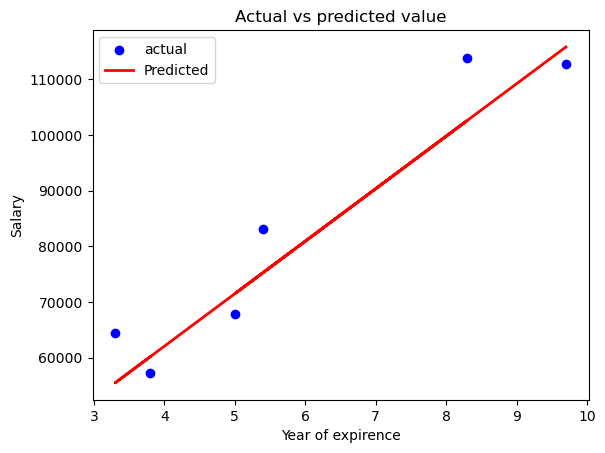

In [140]:
plt.scatter(x_test,y_test,color="blue",label="actual")
plt.plot(x_test,ypred,color="Red",linewidth=2,label="Predicted")
plt.xlabel("Year of expirence")
plt.ylabel("Salary")
plt.title("Actual vs predicted value")
plt.legend()
plt.show()

In [144]:
print("Mean Squared Error",mean_squared_error(y_test,ypred))

Mean Squared Error 49830096.855908334


In [145]:
#multiregression


In [160]:
#confusion Matrix
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [161]:
df=pd.read_csv("ML_datasets/PlayTennis.csv")
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [172]:
x=pd.get_dummies(df[['Outlook','Temperature','Humidity','Wind']])
y=df['Play Tennis'].map({'Yes':1,'No':0})
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [174]:
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [175]:
M=confusion_matrix(y_test,y_pred)
print("Confusion Matrix : \n",M)
accuracy=accuracy_score(y_pred,y_test)
print("Accuracy : ",accuracy)
print("classification_report : ",classification_report(y_test,y_pred))

Confusion Matrix : 
 [[0 1]
 [0 2]]
Accuracy :  0.6666666666666666
classification_report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



C:\Users\chann\anaconda2\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chann\anaconda2\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chann\anaconda2\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [216]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [217]:
df=pd.read_csv('ML_datasets\iris.csv')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [218]:
x=df.iloc[:,0:4]
y=df.select_dtypes(include=[object])
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [219]:
le=preprocessing.LabelEncoder()
y=y.apply(le.fit_transform)


In [220]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y)


In [221]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [222]:
mlp=MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=2000)
mlp.fit(x_train,y_train.values.ravel())
y_pred=mlp.predict(x_test)

In [223]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[14  1  0]
 [ 0 13  2]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.93      0.87      0.90        15
           2       0.88      1.00      0.94        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

0.9333333333333333


In [ ]:
#